<a href="https://colab.research.google.com/github/damarks80/aws-cloudformation-simplified/blob/master/Copy_of_Chapter_5_and_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example dataset for AB Testing.xlsx to example dataset for AB Testing.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample-anova (student).xlsx to sample-anova (student).xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


           mean
group          
A      2.494774
B      3.917763
TtestResult(statistic=-18.07904326900618, pvalue=1.907884544835212e-58, df=589.0)


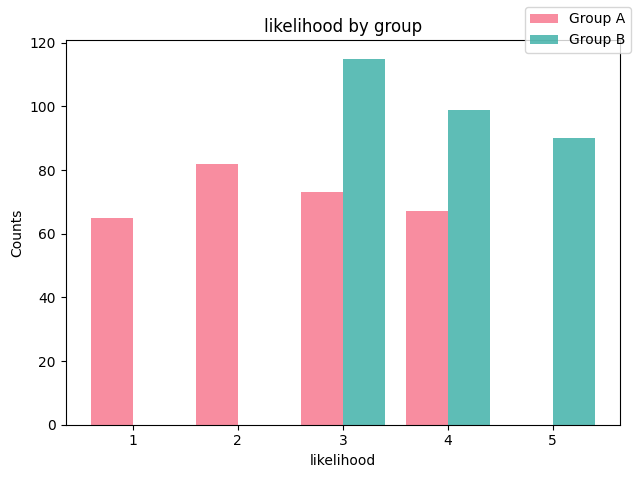

In [ ]:
def display_bar_chart():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib

    # load the data
    df = pd.read_excel('example dataset for AB Testing.xlsx')
    # specify the name of the columns
    df = df.rename(columns={
        'Test': 'group',
        'Likehood of Purchase (1 = very unlikely to 7 = very likely)': 'likelihood'
    })

    # get the frequency of each likelihood for each group
    groupA_counts = dict(df[df.group == 'A'].likelihood.value_counts())
    groupB_counts = dict(df[df.group == 'B'].likelihood.value_counts())

    # create a 1-based collection of likelihoods
    indices = np.arange(1, len(set(df.likelihood)) + 1)

    # replace missing likelihood values with 0
    all_groupA_counts = [0 if idx not in groupA_counts else groupA_counts[idx] for idx in indices]
    all_groupB_counts = [0 if idx not in groupB_counts else groupB_counts[idx] for idx in indices]

    # generate visually distinct colors for each group
    colors = [matplotlib.colors.to_hex(rgb) for rgb in sns.color_palette("husl", 2)]

    # create the figure
    fig, ax = plt.subplots()

    # the size of each collection of 'likelihood' bars
    likelihood_group_width = 0.8

    # the size of each bar within each likelihood group
    bar_width = likelihood_group_width / 2

    # create and style a bar plot for each group
    groupA_bar = plt.bar(indices, all_groupA_counts, bar_width,
                         alpha=0.8, color=colors[0],
                         align='edge', label='Group A')
    groupB_bar = plt.bar(indices + bar_width, all_groupB_counts, bar_width,
                         alpha=0.8, color=colors[1],
                         align='edge', label='Group B')

    # configure the graph
    ax.set_xlabel('likelihood')
    ax.set_ylabel('Counts')
    ax.set_title('likelihood by group')

    # center the ticks and tick labels within each likelihood group
    ax.set_xticks(indices + bar_width)
    ax.set_xticklabels(indices)
    fig.legend()

    fig.tight_layout()
    fig.show()
    plt.show()


def display_mean():
    import pandas as pd
    from scipy import stats

    # load the data
    df = pd.read_excel('example dataset for AB Testing.xlsx')
    # specify the name of the columns
    df = df.rename(columns={
        'Test': 'group',
        'Likehood of Purchase (1 = very unlikely to 7 = very likely)': 'likelihood'
    })

    # means
    print(df.groupby(by='group').agg('mean').rename(columns={'likelihood': 'mean'}))


def display_ttest():
    import pandas as pd
    from scipy import stats

    # load the data
    df = pd.read_excel('example dataset for AB Testing.xlsx')
    # specify the name of the columns
    df = df.rename(columns={
        'Test': 'group',
        'Likehood of Purchase (1 = very unlikely to 7 = very likely)': 'likelihood'
    })

    # TTEST
    a = df[df['group'] == 'A'].likelihood.values
    b = df[df['group'] == 'B'].likelihood.values
    print(stats.ttest_ind(a, b))



display_mean()
display_ttest()
display_bar_chart()

           mean
group          
A      4.012121
B      4.136735
C      4.053232
F_onewayResult(statistic=0.49434370420239254, pvalue=0.6100699098022377)


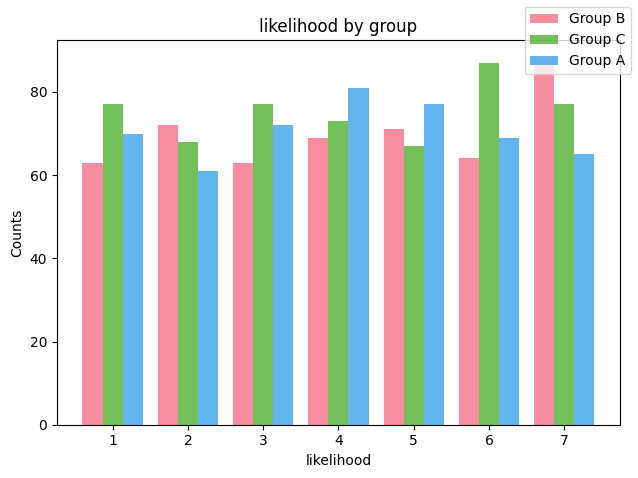

In [ ]:
def display_bar_chart():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib

    # load the data
    df = pd.read_excel('/content/sample-anova (student).xlsx')
    # specify the name of the columns
    df = df.rename(columns={
        'Test': 'group',
        'Likehood of Purchase (1 = very unlikely to 7 = very likely)': 'likelihood'
    })

    # create a 1-based collection of likelihoods
    indices = np.arange(1, len(set(df.likelihood))+1)

    # get all unique groups
    unique_groups = set(df.group)

    # generate visually distinct colors for each group
    colors = [matplotlib.colors.to_hex(rgb) for rgb in sns.color_palette("husl", len(unique_groups))]

    # create the figure
    fig, ax = plt.subplots()

    # the size of each collection of 'likelihood' bars
    likelihood_group_width = 0.8

    # the size of each bar within each likelihood group
    bar_width = likelihood_group_width / len(unique_groups)

    for group_idx, group_name in enumerate(unique_groups):
        # get the frequency of each likelihood for this group
        group_counts = dict(df[df.group == group_name].likelihood.value_counts())

        # replace missing likelihood values with 0
        all_counts = [0 if idx not in group_counts else group_counts[idx] for idx in indices]

        # create the bars for the group
        group_bar = plt.bar(indices + group_idx * bar_width, all_counts, bar_width,
                            alpha=0.8, color=colors[group_idx],
                            align='edge', label='Group {0}'.format(group_name))
    # configure the graph
    ax.set_xlabel('likelihood')
    ax.set_ylabel('Counts')
    ax.set_title('likelihood by group')

    # center the ticks and tick labels within each likelihood group
    ax.set_xticks(indices + likelihood_group_width / 2)
    ax.set_xticklabels(indices)
    fig.legend()

    fig.tight_layout()
    fig.show()
    plt.show()


def display_mean():
    import pandas as pd

    # load the data
    df = pd.read_excel('/content/sample-anova (student).xlsx')
    # specify the name of the columns
    df = df.rename(columns={
        'Test': 'group',
        'Likehood of Purchase (1 = very unlikely to 7 = very likely)': 'likelihood'
    })

    # means
    print(df.groupby(by='group').agg('mean').rename(columns={'likelihood': 'mean'}))


def display_anova():
    import pandas as pd
    from scipy import stats

    # load the data
    df = pd.read_excel('/content/sample-anova (student).xlsx')
    # specify the name of the columns
    df = df.rename(columns={
        'Test': 'group',
        'Likehood of Purchase (1 = very unlikely to 7 = very likely)': 'likelihood'
    })

    # get the likelihood values for each group
    split_groups = [df[df['group'] == group].likelihood for group in set(df['group'].values)]
    print(stats.f_oneway(*split_groups))


display_mean()
display_anova()
display_bar_chart()